# Сборный проект-1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** - проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Изучение общей информации

In [1]:
# импорт библиотек 
# чтение файа с данными и сохранение в data
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')

Изучим таблицу `data`. Выведем первые 10 строк, а также общую информацию:

In [2]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов:
* `Name` - название игры (тип данных - **object**);
* `Platform` - платформа (тип данных - **object**);
* `Year_of_Release` - год выпуска (тип данных - **float64**);
* `Genre` - жанр игры (тип данных - **object**);
* `NA_sales` - продажи в Северной Америке (миллионы проданных копий) (тип данных - **float64**);
* `EU_sales` - продажи в Европе (миллионы проданных копий) (тип данных - **float64**);
* `JP_sales` - продажи в Японии (миллионы проданных копий) (тип данных - **float64**);
* `Other_sales` - продажи в других странах (миллионы проданных копий) (тип данных - **float64**);
* `Critic_Score` - оценка критиков (максимум 100) (тип данных - **float64**);
* `User_Score` - оценка пользователей (максимум 10) (тип данных - **object**);
* `Rating` - рейтинг от организации ESRB (тип данных - **object**).

Сразу бросается в глаза нарушение стиля в заголовках: строчные буквы сочетаются с прописными.

Количество значений в столбцах различается. Значит в данных есть пропущенные значения.

**ВЫВОД**

В каждой строке таблицы `data` содержатся данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Однако в датасете встречаются пропуски, а в названиях колонок - расхождения с хорошим стилем.

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

## Подготовка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Сделаем все символы строчными. Для этого переименуем колонки следующим образом:

* `'Name'` → `'name'`;
* `'Platform'` → `'platform'`;
* `'Year_of_Release'` → `'year_of_release'`;
* `'Genre'` → `'genre'`;
* `'NA_sales'` → `'na_sales'`;
* `'EU_sales'` → `'eu_sales'`;
* `'JP_sales'` → `'jp_sales'`;
* `'Other_sales'` → `'other_sales'`;
* `'Critic_Score'` → `'critic_score'`;
* `'User_Score'` → `'user_score'`;
* `'Rating'` → `'rating'`.

In [5]:
# переименование столбцов
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

Проверим результат. Для этого еще раз выведем на экран названия столбцов:

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбцы успешно переименованы.

### Пропуски значений

Для поиска пропущенных значений обратимся к методу `isna()`, передав результат его работы методу `mean()`:

In [7]:
((data.isna().mean()) * 100).sort_values(ascending=False)

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Итак, мы имеем пропущенные значения в следующих столбцах:

* `critic_score` (оценка критиков) - пропуски в столбцах, содержащих ту или иную оценку не следует заполнять, поскольку любые значения, которые мы подставим в них, исказят результаты корреляционного анализа и стат-тестов.
* `rating` (рейтинг от организации ESRB) - так как это категориальная переменная, заполним ее заглушкой (используем для этих целей значение **"unknown"**).
* `user_score` (оценка пользователей) - ситуация аналогична с `critic_score`.
* `year_of_release` (год выпуска) - пропусков в этом столбце мало, если мы не возьмем их в расчет, врядли упустим что-то важное, поэтому просто удалим их.
* `genre` (жанр игры) - ситуация аналогична с `year_of_release`.
* `name` (название игры) - ситуация аналогична с `year_of_release`.

Также по условию необходимо обратить внимание на аббревиатуру `tbd` в столбце `user_score`. Посмотрим, насколько часто оно встречается. Для этого посчитаем количество строк, содержащих эту аббревиатуру:

In [8]:
data[data['user_score'] == 'tbd'].shape

(2424, 11)

2 424 строки.

`tbd` расшифровывается как `'to be defined'` *(предстоит определить)*. Так как оценка пока еще не известна, будет логично заменить `tbd` на **"nan"**.

Сперва вместо пропущенных значений в столбце `rating` подставим строку **"unknown"**:

In [9]:
data['rating'] = data['rating'].fillna('unknown')

Теперь заменим `tbd` в столбце `user_score` на  **"nan"**:

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

И в конце отфильтруем строки, содержащие пропуски в столбцах `year_of_release`, `genre`, `name`:

In [11]:
columns = ['year_of_release', 'genre', 'name']
for column in columns:
    data = data[data[column].isna() == False]

Убедимся, что в таблице не осталось пропусков, кроме как в столбцах `critic_score` и `user_score`

In [12]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.000000
dtype: float64

### Изменение типов данных

Ранее было замечено, что поле, содержащее информацию о годе выпуска игры, имеет тип данных **float64**. Так как у года нет дробной части, можно смело изменить тип данных с **object** на **int**. 

Также данные в столбце `user_score` имеют тип **object**. Так как в дальнейшем они нам пригодятся для анализа (диаграмма рассеяния не построится по **object**), изменим их тип на **float64**.

Осуществим это с помощью `astype()`, после выведем еще раз общую информацию о таблице:

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Тип данных успешно изменен.

### Дубликаты

Проверим, есть ли в таблице строки, полностью дублирующие друг друга (отдельно дубликаты названий игр искать бессмысленно - их будет много в силу того, что у них могут быть как разные платформы, так и рейтинги):

In [14]:
data[data.duplicated(keep = False)].sort_values(by = list(data.columns))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Ни по одной игре информация не задвоилась.

**ВЫВОД**

Предобработка обнаружила три проблемы в данных:
* нарушения в стиле заголовков;
* пропущенные значения;
* значения `tbd` в столбце `user_score`.

Заголовки были исправлены, чтобы упростить работу с балицей.

Пропущенные значения были заменены на **"unknown"**. Некоторые строки, содержащие пропуски, были отброшены.

Теперь можно переходить к дальнейшему анализу.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посчитаем, сколько игр было выпущено в каждом году. Для этого сгруппируем данные из таблицы `data` по годам, посчитав количество записей в столбце `name`. Результат выведем на экран:

In [15]:
data.groupby('year_of_release').agg({'name': 'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Можно заметить, что рывок в релизах игр произошел в 1994 году (по сравнению с предыдущим годом количество выпущенных игр увеличилось вдвое). И с тех пор поддерживается положительная динамика вплоть до 2011 года. После - пошел резкий спад. Для большей наглядности изобразим результат в виде графика:

Text(0, 0.5, 'Количество выпущенных игр')

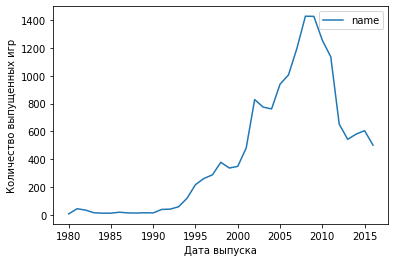

In [16]:
data.groupby('year_of_release').agg({'name': 'count'}).plot()
plt.xlabel('Дата выпуска')
plt.ylabel('Количество выпущенных игр')

Действительно, с 1980 г. по 1995 г. выпускалось крайне мало игр. Смотря на график, сложно говорить о какой-либо успешности. Однако с 1995 г. данная индустрия начинает набирать обороты. Поэтому, в рамках исследования данные за годы, предшествующие 1995 г., не важны.

Говоря об успешности, мало иметь представление лишь о количестве выпущенных игр. В первую очередь успешность определяется количеством проданных экземпляров. Посмотрим на динамику общих продаж. Для этого сперва посчитаем, сколько всего было продано копий каждой игры в Северной Америке, Европе, Японии и других регионах, сохраним полученный результат в столбце `total_sales`:

In [17]:
data['total_sales'] = data['na_sales'] + data['jp_sales'] + data['other_sales'] + data['eu_sales']

Теперь посчитаем сумму проданных экземпляров по каждому году:

Text(0, 0.5, 'Количество проданных игр, млн.')

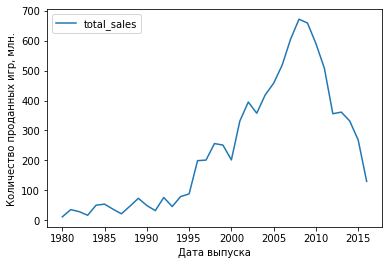

In [18]:
data.groupby('year_of_release').agg({'total_sales': 'sum'}).plot()
plt.xlabel('Дата выпуска')
plt.ylabel('Количество проданных игр, млн.')

Новый график также иллюстрирует ситуацию, когда, начиная с 1995 г. продажи компьютерных игр начали резко расти. Все-таки получается, что период с 1980 по 1995 гг. наименее интересный.

### Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Найдем сумму проданных экземпляров по каждой из платформ. Для этого сгруппируем данные из таблицы `data` и суммируем значения из ранее созданного столбца `total_sales`. Результат отсортируем по убыванию значений столбца `total_sales` и сохраним в переменную `platform_sales`:

In [19]:
platform_sales = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').reset_index()
platform_sales

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Самая продаваемая платформа - PS2. Платформа, не пользующаяся популярностью - PCFX.

Сохраним в переменной `platform_sales` топ-10 платформ, лидирующиих по продажам:

In [20]:
platform_sales = platform_sales.tail(10)['platform'].to_list()

Построим распределение по годам для выбранных платформ за все время:

<AxesSubplot:xlabel='year_of_release'>

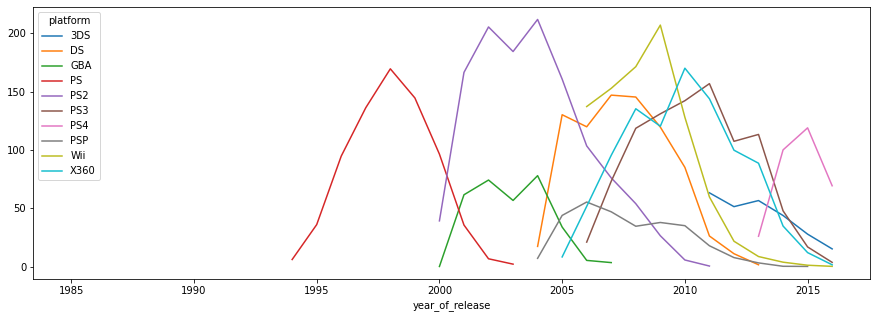

In [21]:
data.query('platform in @platform_sales').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,5))

Глядя на график навскидку можно сказать, что срок жизни каждой платформы, которая входит в топ-10, равен практически 10 годам.

### Возьмите данные за соответствующий актуальный период.

Рассмотрим топ-10 платформ, выявленных ранее. Сгруппируем данные из таблицы `data` таким образом, чтобы на выходе получить информацию о том, сколько было продано копий игр отдельной платформы за каждый год. Результат сохраним в переменную `actual_period`:

In [22]:
actual_period = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('platform in @platform_sales and total_sales > 1')

Для того, чтобы определить актуальный период, по которому будет проводиться последующий анализ, необходимо рассчитать жизненный период каждой платформы. Для этого посчитаем, сколько лет существовала каждая из них, а после найдем среднее значение:

In [23]:
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release': 'count'}) 
actual_period.mean()

year_of_release    9.1
dtype: float64

Получается, что в среднем платформы, вошедшие в топ-10, живут 9 лет.

По условию необходимо построить прогноз на 2017 г. Исходя из этого определим актуальным периодом = 2017 - 9. Получается период, берущий начало в 2008 г.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Рассмотрим наш топ-10 платформ в период с 2008 года:

In [24]:
data.query('platform in @platform_sales and year_of_release > 2007').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,
2008,NaN,145.31,53.90,118.52,NaN,34.55,171.32,135.26
2009,NaN,119.54,26.40,130.93,NaN,37.78,206.97,120.29
2010,NaN,85.02,5.64,142.17,NaN,35.04,127.95,170.03
2011,63.20,26.18,0.45,156.78,NaN,17.82,59.65,143.84
2012,51.36,11.01,NaN,107.36,NaN,7.69,21.71,99.74
2013,56.57,1.54,NaN,113.25,25.99,3.14,8.59,88.58
2014,43.76,NaN,NaN,47.76,100.00,0.24,3.75,34.74
2015,27.78,NaN,NaN,16.82,118.90,0.12,1.14,11.96
2016,15.14,NaN,NaN,3.60,69.25,NaN,0.18,1.52


Глядя на полученную таблицу, можно точно сказать, в каком году закончились продажи каждой платформы. А для платформы PS4 - определить год появления. Для наглядности представим информацию в виде графика: 

<AxesSubplot:xlabel='year_of_release'>

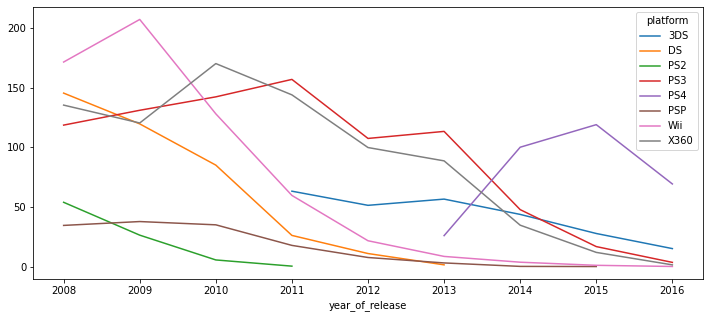

In [25]:
data.query('platform in @platform_sales and year_of_release > 2007').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(12,5))

На графике четко видно, что за рассмотренный период времени:
1. Лидер продаж - Wii, на втором месте - PSP, на третьем - PS3;
2. Платформа PS4, чей жизненный цикл пока еще не подходит к концу, расположилась на 5 месте, уступив DS;
3. По трем платформам прекратились продажи: 
    * PS2 - в 2011 году;
    * DS - в 2013 году;
    * PSP - в 2015 году.

Для того, чтобы определить потенциально прибыльные платформы, посмотрим поближе, как обстоят дела на конец 2016 года:

<AxesSubplot:xlabel='year_of_release'>

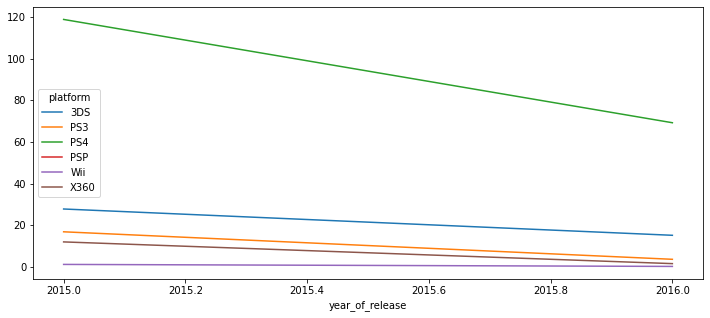

In [26]:
data.query('platform in @platform_sales and year_of_release > 2014').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(12,5))

На графике видно, что практически доживает свой срок Wii - у нее на конец 2016 года самые низкие продажи. Не далеко от нее ушла  X360. На плаву пока остаются PS4 - безусловный лидер в 2016 году, PS3, а также 3DS. Пожалуй, **потенциально прибыльным лидером можно считать платформу PS4**, если судить по предыдущим расчетам (где получилось, что средний срок жизни платформ из топ-10 - 9 лет), то жить ей еще 6 лет, чего не скажешь об остальных. 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Рассмтрим выделенную ранее десятку платформ:

Text(0, 0.5, 'Количество проданных экземпляров, млн.')

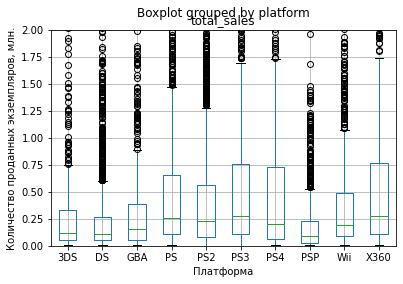

In [27]:
data.query('platform in @platform_sales').boxplot(column='total_sales', by='platform')
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных экземпляров, млн.')



График позволяет увидеть лидеров продаж (PS3, X360, PS, PS2,PS4, Wii, GBA), а также тех, у кого продажи идут не очень (3DS, DS, PSP). Наличие большого количества выбросов за пределами верхник границ "ящика" говорит о том, что у каждой платформы есть определенный набор бестселлеров.

### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Построим для потенциально прибыльных платформ диаграмму рассеяния, которая покажет зависимость между отзывами пользователей и количеством проданных копий. Рассчитаем коэффициент корреляции Пирсона для каждой из платформ.

Коэффициент корреляции для 3DS : 0.2220784364339088
Коэффициент корреляции для PS3 : 0.12841562938563025
Коэффициент корреляции для PS4 : -0.03195711020455643


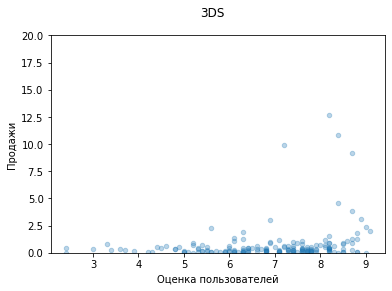

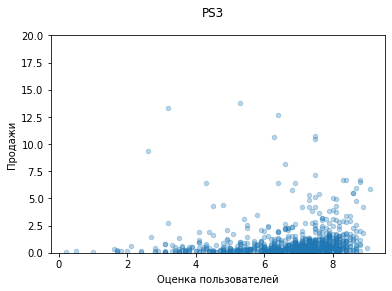

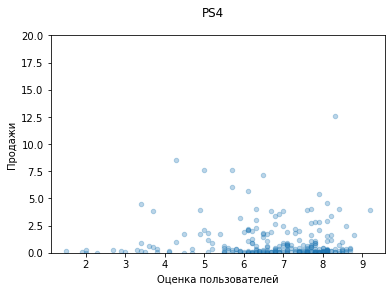

In [28]:
platforms = ['3DS', 'PS3', 'PS4']
for platform in platforms:
    data[data['platform'] == platform].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['user_score'].corr(data[data['platform'] == platform]['total_sales']))
    plt.suptitle(platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.ylim(0,20)

Судя по диаграммам и коэффициентам корреляции, оценки пользователей и продажи связаны очень слабо. Посмотрим, как обстоят дела у критиков:

Коэффициент корреляции для 3DS : 0.3487397305984834
Коэффициент корреляции для PS3 : 0.43275895789971364
Коэффициент корреляции для PS4 : 0.4065679020617816


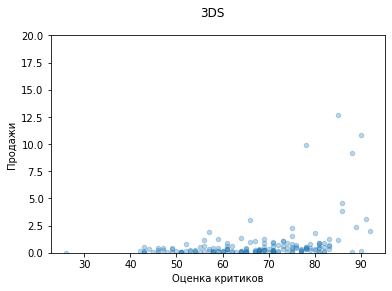

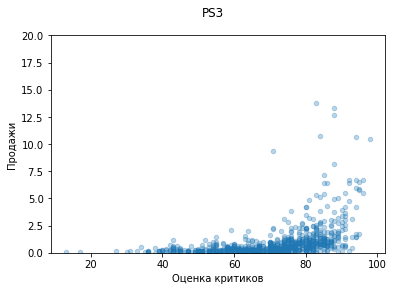

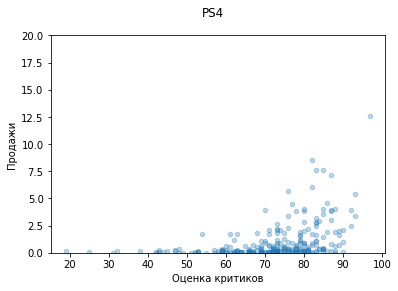

In [29]:
platforms = ['3DS', 'PS3', 'PS4']
for platform in platforms:
    data[data['platform'] == platform].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['critic_score'].corr(data[data['platform'] == platform]['total_sales']))
    plt.suptitle(platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.ylim(0,20)

Отзывы критиков коррелируют с продажами чуть лучше, чем отзывы пользователей. Однако уровень связи все еще низкий. Посмотрим, зависят ли как-то отзывы пользователей и критиков:

Коэффициент корреляции для 3DS : 0.7452221337984232
Коэффициент корреляции для PS3 : 0.6311540844454816
Коэффициент корреляции для PS4 : 0.5576539782764632


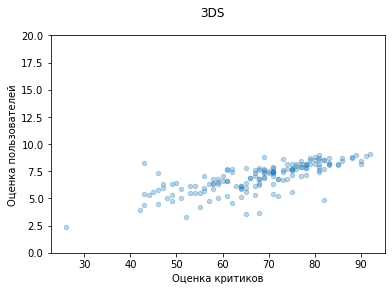

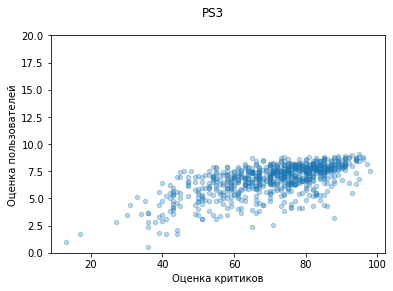

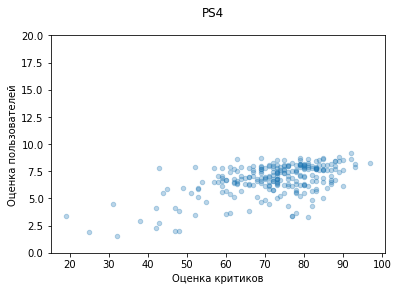

In [30]:
platforms = ['3DS', 'PS3', 'PS4']
for platform in platforms:
    data[data['platform'] == platform].plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['critic_score'].corr(data[data['platform'] == platform]['user_score']))
    plt.suptitle(platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Оценка пользователей')
    plt.ylim(0,20)

Судя по диаграммам и коэффициентам, оценки критиков и пользователей связаны между собой достаточно хорошо.

### Соотнесите выводы с продажами игр на других платформах.

Повторим действия из п. 3.6 для остальных платформ, входящих в топ-10: **DS**, **PS2**, **PSP**, **Wii**, **X360**.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для каждой платформы:

Коэффициент корреляции для DS : 0.130876009758442
Коэффициент корреляции для PS2 : 0.17505502770383724
Коэффициент корреляции для PSP : 0.2208902672304438
Коэффициент корреляции для Wii : 0.11283121360773779
Коэффициент корреляции для X360 : 0.11418661214018039


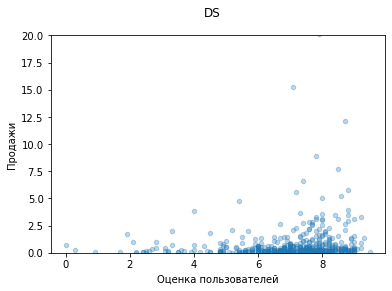

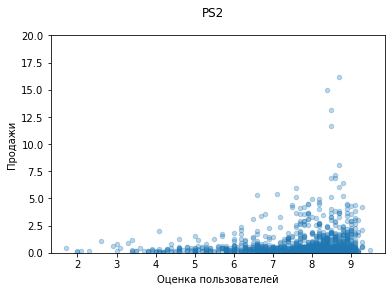

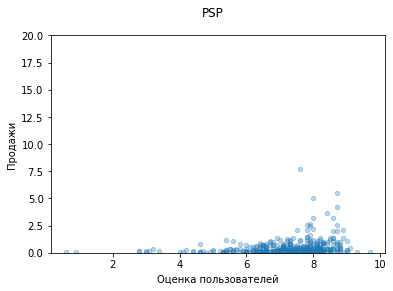

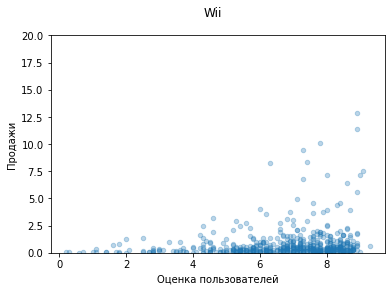

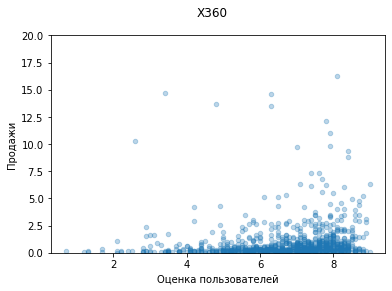

In [31]:
platforms = ['DS', 'PS2', 'PSP', 'Wii', 'X360']
for platform in platforms:
    data[data['platform'] == platform].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['user_score'].corr(data[data['platform'] == platform]['total_sales']))
    plt.suptitle(platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.ylim(0,20)

По сравнению с потенциально прибыльными платформами разницы особой не наблюдается: очень низкая корреляция, практически нулевая. Посмотрим, как обстоят дела у критиков:

Коэффициент корреляции для DS : 0.2375457985411348
Коэффициент корреляции для PS2 : 0.3925364754450901
Коэффициент корреляции для PSP : 0.3175245100513487
Коэффициент корреляции для Wii : 0.17790728577594925
Коэффициент корреляции для X360 : 0.39286589254007


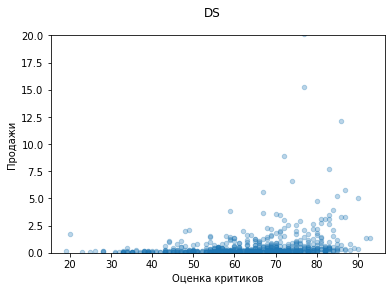

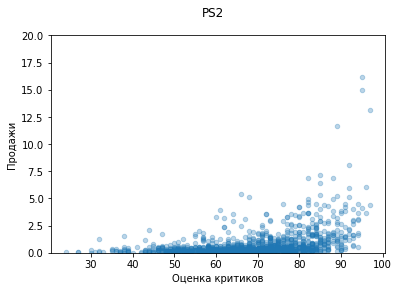

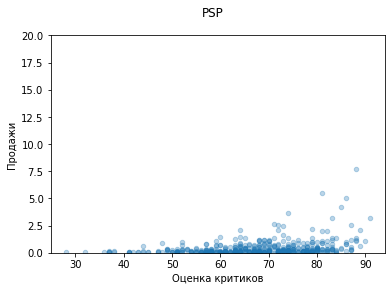

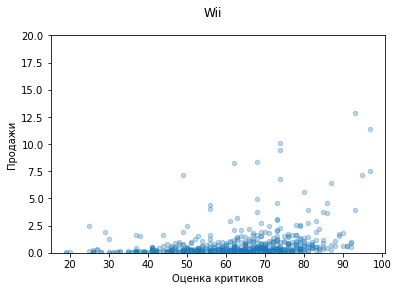

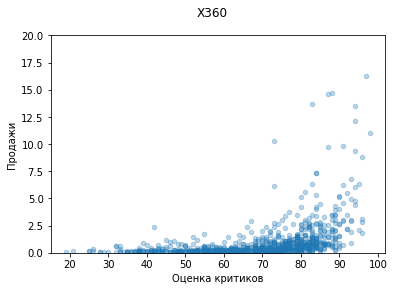

In [32]:
platforms = ['DS', 'PS2', 'PSP', 'Wii', 'X360']
for platform in platforms:
    data[data['platform'] == platform].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['critic_score'].corr(data[data['platform'] == platform]['total_sales']))
    plt.suptitle(platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.ylim(0,20)

По сравнению с потенциально прибыльными корреляция значительно ниже. Посмотрим, зависят ли как-то отзывы пользователей и критиков:

Коэффициент корреляции для DS : 0.6539082647783929
Коэффициент корреляции для PS2 : 0.5658412443809723
Коэффициент корреляции для PSP : 0.5266940052311532
Коэффициент корреляции для Wii : 0.6882854908327511
Коэффициент корреляции для X360 : 0.6250204504122279


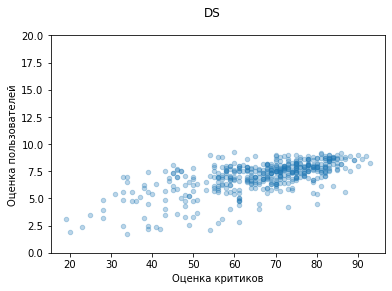

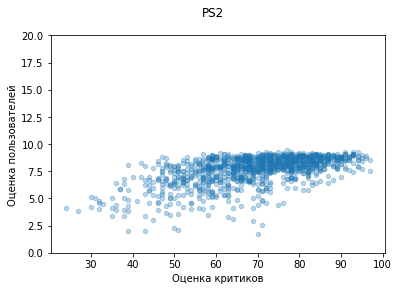

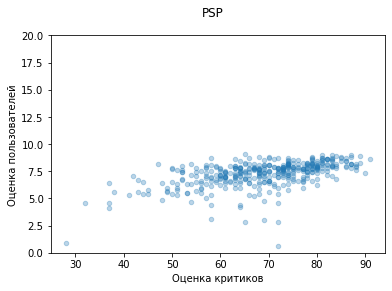

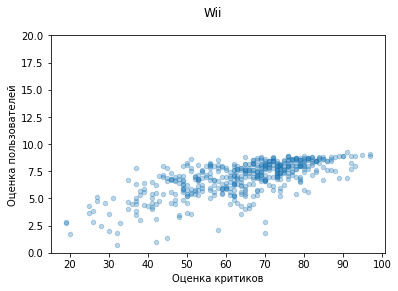

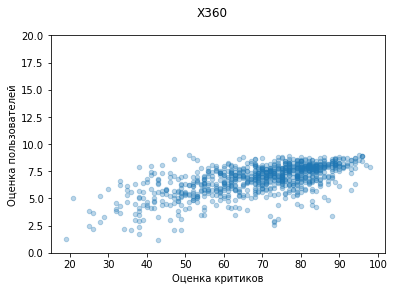

In [33]:
platforms = ['DS', 'PS2', 'PSP', 'Wii', 'X360']
for platform in platforms:
    data[data['platform'] == platform].plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3)
    print('Коэффициент корреляции для', platform, ':',  data[data['platform'] == platform]['critic_score'].corr(data[data['platform'] == platform]['user_score']))
    plt.suptitle(platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Оценка пользователей')
    plt.ylim(0,20)

Так же как и у потенциально прибыльных платфор наблюдается сильная связь между отзывами критиков и пользователей.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для начала посмотрим, сколько игр было выпущено в каждом жанре:

Text(0, 0.5, 'Количество выпущенных игр')

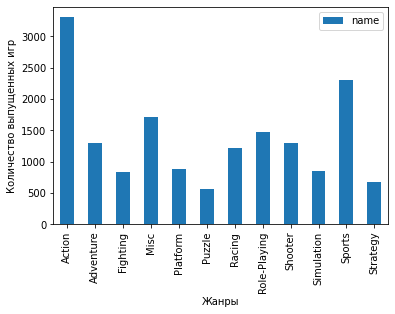

In [34]:
data.groupby('genre').agg({'name': 'count'}).plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Количество выпущенных игр')

На графике видно два наиболее популярных жанра: Action и Sports. Меньше всего игр выпущено в жанрах Puzzle, Strategy, Fighting и Platform. Среднячки - Adventure, Misc, Racing, Role-Playing, Shooter. Посмотрим, как обстоят дела с продажами:

<AxesSubplot:xlabel='genre'>

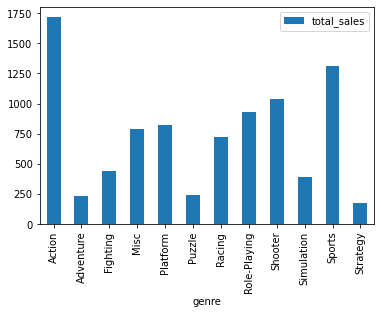

In [35]:
data.groupby('genre').agg({'total_sales': 'sum'}).plot(kind='bar')

Самые прибыльные женры - те, в которых выпущено больше всего игр: Action и Sports. Это объясняется большим тиражом. Среди жанров с маленьким количеством игр из общей картины выбивается Platform. Для относительно маленького количества выпущенных игр заметен большой их тираж. Жанр, являющийся самым нераспространенным, закономерно самый непродаваемый.

## Составление портрета пользователя каждого региона

### Топ-5 популярных платформ

Наш актуальный период: 2008-2016 гг. Составим рейтинг из топ-5 популярных платформ для каждого из регионов:

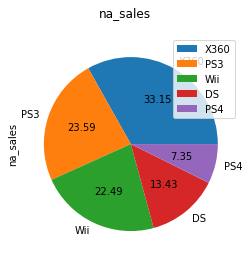

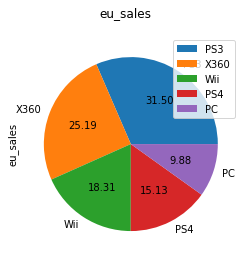

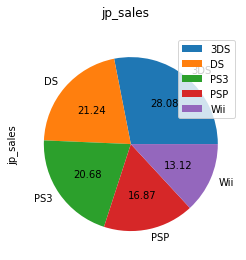

In [36]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions_sales:
    sales_data = data.query('year_of_release > 2007').pivot_table(index='platform',  values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()
    sales_data.plot.pie(x='platform', y=region, autopct='%.2f')
    plt.suptitle(region)

Самая популярная платформа в Северной Америке - X360, доля игр, проданных ддя нее составляет 33.15%. В Европе наибольшей популярностью пользуется PS3 (31.50%), в Японии - 3DS. Примечательно, что 3DS не входит в топ-5 платформ в Европе и Северной америке. 

Также в Европе хорошо идут продажи X360 - данная платформа занимает второе место, доля проданных игр - 25.29%. 

И в Северной Америке и в Европе практически одинаково пользуется популярностью платформа Wii - в обоих регионах она занимает третье место по продажам. 

В целом рынок популярных платформ в Европе и Северной Америке очень схож, чего не скажешь о Японии - популярные для нее платформы 3DS, DS либо вовсе отсутствуют в других регионах, либо занимают одну из последних позиций. Также стоит отметить, что популярная в Европе и Северной Америке платформа Wii не является таковой в Японии.

### Топ-5 популярных жанров

Посмотрим, как распределены продажи по жанрам в каждом регионе:

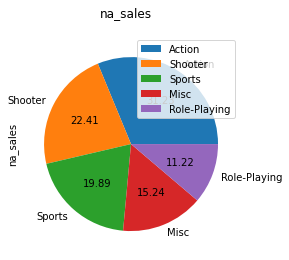

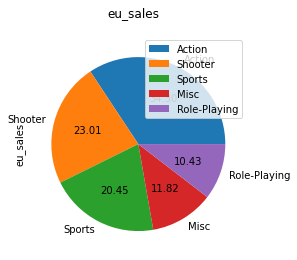

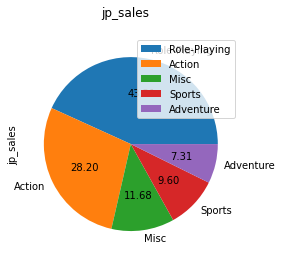

In [37]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions_sales:
    sales_data = data.query('year_of_release > 2007').pivot_table(index='genre',  values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()
    sales_data.plot.pie(x='genre', y=region, autopct='%.2f')
    plt.suptitle(region)

Ситуация с продажами по жанрам весьма интересная. В Северной Америке и Европе мы можем наблюдать одинаковую картину: самый популярный жанр - Action, сразу за ним идут Shooter, Sports, Misc и Role-Playing.

В Японии же все наоборот. Самый популярный жанр - Role-Playing, уже потом идет Action. Также в топ-5 жанров в этой стране входит Adventure, который отсутствует в двух других регионах.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Согласно информации из интернета:
* EC - для детей раннего возраста;
* E - для всех;
* E10+ - для всех старше 10 лет;
* T - для подростков 13-19 лет;
* M - от 17 лет;
* AO - только для взрослых.

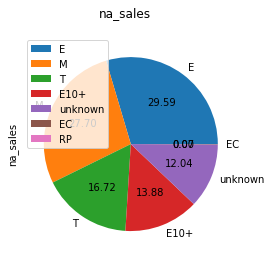

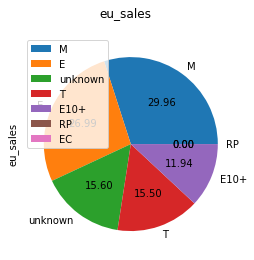

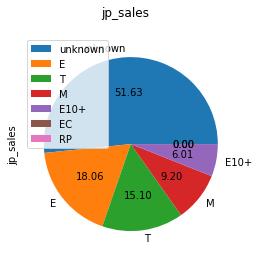

In [38]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions_sales:
    sales_data = data.query('year_of_release > 2007').pivot_table(index='rating',  values=region, aggfunc='sum').sort_values(by=region, ascending=False)
    sales_data.plot.pie(x='rating', y=region, autopct='%.2f')
    plt.suptitle(region)
    

Между рынками есть разница по продажам игр разного возрастного рейтинга. В основном на это влияют разные жанровые предпочтения.Можно сказать, что это созависимые параметры. Например, в Северной Америке самый популярный жанр игр - Action, который явно относится к категории "для всех". Как следствие, в этом регионе высокие продажи игр с соответствующим рейтингом. К категории для людей старше 17 лет из представленных жанров можно отнести Shooter. И доля продаж по этому рейтингу напрямую зависит от продажи стрелялок. Поэтому можно сказать, что рейтинг ESRB не влияет на продажи.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:
* **Нулевая гипотеза** - средние пользовательские рейтинги одинаковые;
* **Альтернативная гипотеза** - средние пользовательские рейтинги не одинаковые.

Для проверки гипотез обратимя к методу `ttest_ind()`. Уровень alpha зададим 0.05.

Метод `ttest_ind()` имеет параметр **equal_var**, который может принимать значения **True** и **False**. Поскольку наша цель - найти различия средний величин, то мы уже заранее предполагаем, что распределения отличаются, а значит и дисперсии отличаются. Получается, что необходимо указывать **equal_var = False**. Однако необходимо проверить, насколько данный ход мыслей верен. Прежде чем расчитать дисперсии, необходимо избавиться от пропущенных значений в столбце **user_score** (оставить их не получится, потому что статтест не отработает, а заменять их на медианные/средние значения не стоит, это может исказить финальную картину): 

In [39]:
# удаляем пропуски в столбце user_score
data_user_score = data[data['user_score'].isna() == False]

Проверим, все ли удалилось:

In [40]:
print('Осталось пропущенных значений: ', data_user_score['user_score'].isna().sum())

Осталось пропущенных значений:  0


Отлично, теперь можно расчитать дисперсии, средние и средние отклонения:

In [41]:
data_user_score.query('platform == "PC" or platform == "XOne"').pivot_table(index='platform', aggfunc = {'user_score': ['mean', 'std', 'var']})

user_score                    
               mean       std       var
platform                               
PC         7.065960  1.532718  2.349224
XOne       6.521429  1.380941  1.906997

Вот все и подтвердилось: дисперсии разные. Присваиваем **False** параметру **equal_var**. Проверим первую гипотезу:

In [42]:
xb_platform = data_user_score[data_user_score['platform'] == 'XB']['user_score']
pc_platform = data_user_score[data_user_score['platform'] == 'PC']['user_score']

alpha = .05

result = st.ttest_ind(xb_platform, pc_platform, equal_var=False)

print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  3.69017314357026e-08
Отвергаем нулевую гипотезу


Результат проведенного теста говорит о том, что средние пользовательские рейтинги различаются. Основная гипотеза, сформулированная ранее, опроверглась.

### Средние пользовательские рейтинги жанров Action  и Sports разные

Сформулируем нулевую и альтернативную гипотезу:
* **Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковы;
* **Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports различаются.

Будем использовать метод ttest_ind(). Начнем с расчета дисперсий:

In [43]:
data_user_score.query('genre == "Action" or genre == "Sports"').pivot_table(index='genre', aggfunc = {'user_score': ['mean', 'std', 'var']})

user_score                    
             mean       std       var
genre                                
Action   7.058129  1.423901  2.027494
Sports   6.951434  1.619585  2.623056

Дисперсии и средние хоть и не существенно, но все же отличаются. Проведем тест:

In [44]:
xb_platform = data_user_score[data_user_score['genre'] == 'Action']['user_score']
pc_platform = data_user_score[data_user_score['genre'] == 'Sports']['user_score']

alpha = .05

result = st.ttest_ind(xb_platform, pc_platform, equal_var=False)

print('p-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Результат теста говорит о том, что средние пользовательские рейтинги жанров Action и Sports можно считать одинаковыми. Основная гипотеза, сформулированная в начале, не подтвердилась.

## Итоги исследования

В ходе исследования проверили две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Первая гипотеза не подтвердилась. Средний пользовательский рейтинг у платформы PC выше, чем у Xbox One.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Вторая гипотеза не подтвердилась. Средние пользовательские рейтинги этих двух жанров можно считать одинаковыми.

Если делать ставки на продвижение одной определенной платформы, то это однозначно должна быть PS4 с жанром игр либо Action, либо Shooter, поскольку они лидируют в выбранных регионах.